Avaliação Final: 24.999999999999986


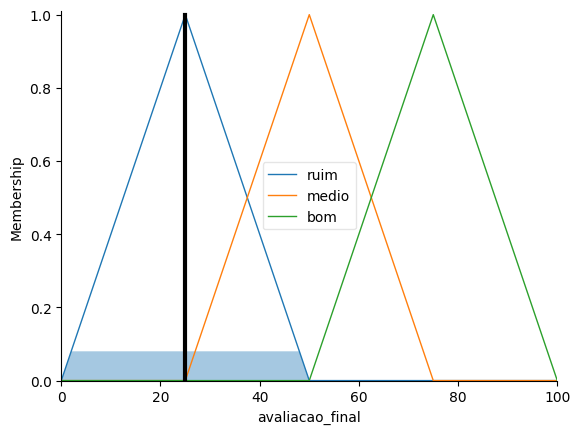

In [7]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


equipamento = ctrl.Antecedent(np.arange(0, 101, 1), 'equipamentos')
ergonomia = ctrl.Antecedent(np.arange(0, 101, 1), 'ergonomia')
iluminacao = ctrl.Antecedent(np.arange(0, 101, 1), 'iluminacao')  
temperatura = ctrl.Antecedent(np.arange(5, 41, 1), 'temperatura')  
avaliacao_final = ctrl.Consequent(np.arange(0, 101, 1), 'avaliacao_final')

equipamento['ruim'] = fuzz.trimf(equipamento.universe, [0, 25, 50])
equipamento['medio'] = fuzz.trimf(equipamento.universe, [25, 50, 75])
equipamento['bom'] = fuzz.trimf(equipamento.universe, [50, 75, 100])

ergonomia['ruim'] = fuzz.trimf(ergonomia.universe, [0, 25, 50])
ergonomia['medio'] = fuzz.trimf(ergonomia.universe, [25, 50, 75])
ergonomia['bom'] = fuzz.trimf(ergonomia.universe, [50, 75, 100])

iluminacao['ruim'] = fuzz.trimf(iluminacao.universe, [0, 20, 40])
iluminacao['medio'] = fuzz.trimf(iluminacao.universe, [25, 52, 75])
iluminacao['bom'] = fuzz.trimf(iluminacao.universe, [60, 80, 100])

temperatura['baixo'] = fuzz.trimf(temperatura.universe, [5, 9, 17])  # Triangular
temperatura['confortavel'] = fuzz.trapmf(temperatura.universe, [14, 18, 22, 26])  # Trapezoidal
temperatura['quente'] = fuzz.trimf(temperatura.universe, [25, 35, 40])  # Triangular

avaliacao_final['ruim'] = fuzz.trimf(avaliacao_final.universe, [0, 25, 50])
avaliacao_final['medio'] = fuzz.trimf(avaliacao_final.universe, [25, 50, 75])
avaliacao_final['bom'] = fuzz.trimf(avaliacao_final.universe, [50, 75, 100])

rule1 = ctrl.Rule((iluminacao['ruim'] & ergonomia['ruim'] & temperatura['baixo'] & equipamento['ruim']), avaliacao_final['ruim'])
rule2 = ctrl.Rule((iluminacao['ruim'] & ergonomia['ruim'] & temperatura['quente'] & equipamento['ruim']), avaliacao_final['ruim'])
rule3 = ctrl.Rule((iluminacao['bom'] & ergonomia['bom'] & temperatura['confortavel'] & equipamento['bom']), avaliacao_final['bom'])
rule4 = ctrl.Rule((iluminacao['ruim'] & ergonomia['bom'] & temperatura['baixo'] & equipamento['ruim']), avaliacao_final['ruim'])
rule5 = ctrl.Rule((iluminacao['bom'] & ergonomia['bom'] & temperatura['baixo'] & equipamento['ruim']), avaliacao_final['ruim'])
rule6 = ctrl.Rule((iluminacao['ruim'] & ergonomia['ruim'] & temperatura['quente'] & equipamento['ruim']), avaliacao_final['ruim'])
rule7 = ctrl.Rule((iluminacao['bom'] & ergonomia['medio'] & temperatura['confortavel'] & equipamento['medio']), avaliacao_final['medio'])
rule8 = ctrl.Rule((iluminacao['bom'] & ergonomia['ruim'] & temperatura['quente'] & equipamento['ruim']), avaliacao_final['ruim'])
rule9 = ctrl.Rule((iluminacao['ruim'] & ergonomia['bom'] & temperatura['confortavel'] & equipamento['medio']), avaliacao_final['medio'])
rule10 = ctrl.Rule((iluminacao['ruim'] & ergonomia['medio'] & temperatura['confortavel'] & equipamento['medio']), avaliacao_final['medio'])

sistema_controle = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
sistema_simulacao = ctrl.ControlSystemSimulation(sistema_controle)


sistema_simulacao.input['equipamentos'] = 2
sistema_simulacao.input['ergonomia'] = 9
sistema_simulacao.input['iluminacao'] = 6
sistema_simulacao.input['temperatura'] = 6

sistema_simulacao.compute()

print(f"Avaliação Final: {sistema_simulacao.output['avaliacao_final']}")

avaliacao_final.view(sim=sistema_simulacao)
